In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/jamisonproctor/Documents/dev/mqtt_intelligent_manufacturing/data/intelligent-manufacturing-dataset/manufacturing_6G_dataset.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

In [3]:
# --- Timestamp cleanup ---
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# --- Convert object columns to category ---
data = data.apply(lambda col: col.astype('category') if col.dtypes == 'object' else col)

# --- Ensure Machine_ID is categorical ---
if 'Machine_ID' in data.columns:
    data['Machine_ID'] = data['Machine_ID'].astype('category')
    
# --- Numeric rounding and type optimization ---
rounding_rules = {
    'Temperature_C': 3,
    'Vibration_Hz': 3,
    'Power_Consumption_kW': 3,
    'Network_Latency_ms': 3,
    'Packet_Loss_%': 3,
    'Quality_Control_Defect_Rate_%': 3,
    'Production_Speed_units_per_hr': 1
}

for col, decimals in rounding_rules.items():
    if col in data.columns:
        data[col] = data[col].round(decimals).astype('float32')

# --- Rename percentage columns for cleaner names ---
data.rename(columns={
    'Packet_Loss_%': 'Packet_Loss_Percent',
    'Quality_Control_Defect_Rate_%': 'Quality_Control_Defect_Rate_Percent'
}, inplace=True)

# --- Drop unused columns ---
data.drop(columns=[
    'Predictive_Maintenance_Score',
    'Error_Rate_%',
    'Efficiency_Status'
], inplace=True, errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Timestamp                            100000 non-null  datetime64[ns]
 1   Machine_ID                           100000 non-null  category      
 2   Operation_Mode                       100000 non-null  category      
 3   Temperature_C                        100000 non-null  float32       
 4   Vibration_Hz                         100000 non-null  float32       
 5   Power_Consumption_kW                 100000 non-null  float32       
 6   Network_Latency_ms                   100000 non-null  float32       
 7   Packet_Loss_Percent                  100000 non-null  float32       
 8   Quality_Control_Defect_Rate_Percent  100000 non-null  float32       
 9   Production_Speed_units_per_hr        100000 non-null  float32       
dt

In [4]:
data.isna().sum()

Timestamp                              0
Machine_ID                             0
Operation_Mode                         0
Temperature_C                          0
Vibration_Hz                           0
Power_Consumption_kW                   0
Network_Latency_ms                     0
Packet_Loss_Percent                    0
Quality_Control_Defect_Rate_Percent    0
Production_Speed_units_per_hr          0
dtype: int64

In [5]:
all_nan_rows = data[data.isna().all(axis=1)]
print(f"Rows with all NaN values: {len(all_nan_rows)}")

numeric_cols = data.select_dtypes(include='number').columns
all_zero_rows = data[(data[numeric_cols] == 0).all(axis=1)]
print(f"Rows with all zero values (numeric cols only): {len(all_zero_rows)}")


threshold = 0.8  # e.g. 80%
mostly_zero = (data[numeric_cols] == 0).mean(axis=1) > threshold
mostly_nan = data.isna().mean(axis=1) > threshold
print(f"Rows mostly zero: {mostly_zero.sum()}")
print(f"Rows mostly NaN: {mostly_nan.sum()}")

Rows with all NaN values: 0
Rows with all zero values (numeric cols only): 0
Rows mostly zero: 0
Rows mostly NaN: 0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(exclude='number').columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Numeric columns: ['Temperature_C', 'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_Percent', 'Quality_Control_Defect_Rate_Percent', 'Production_Speed_units_per_hr']
Categorical columns: ['Timestamp', 'Machine_ID', 'Operation_Mode']


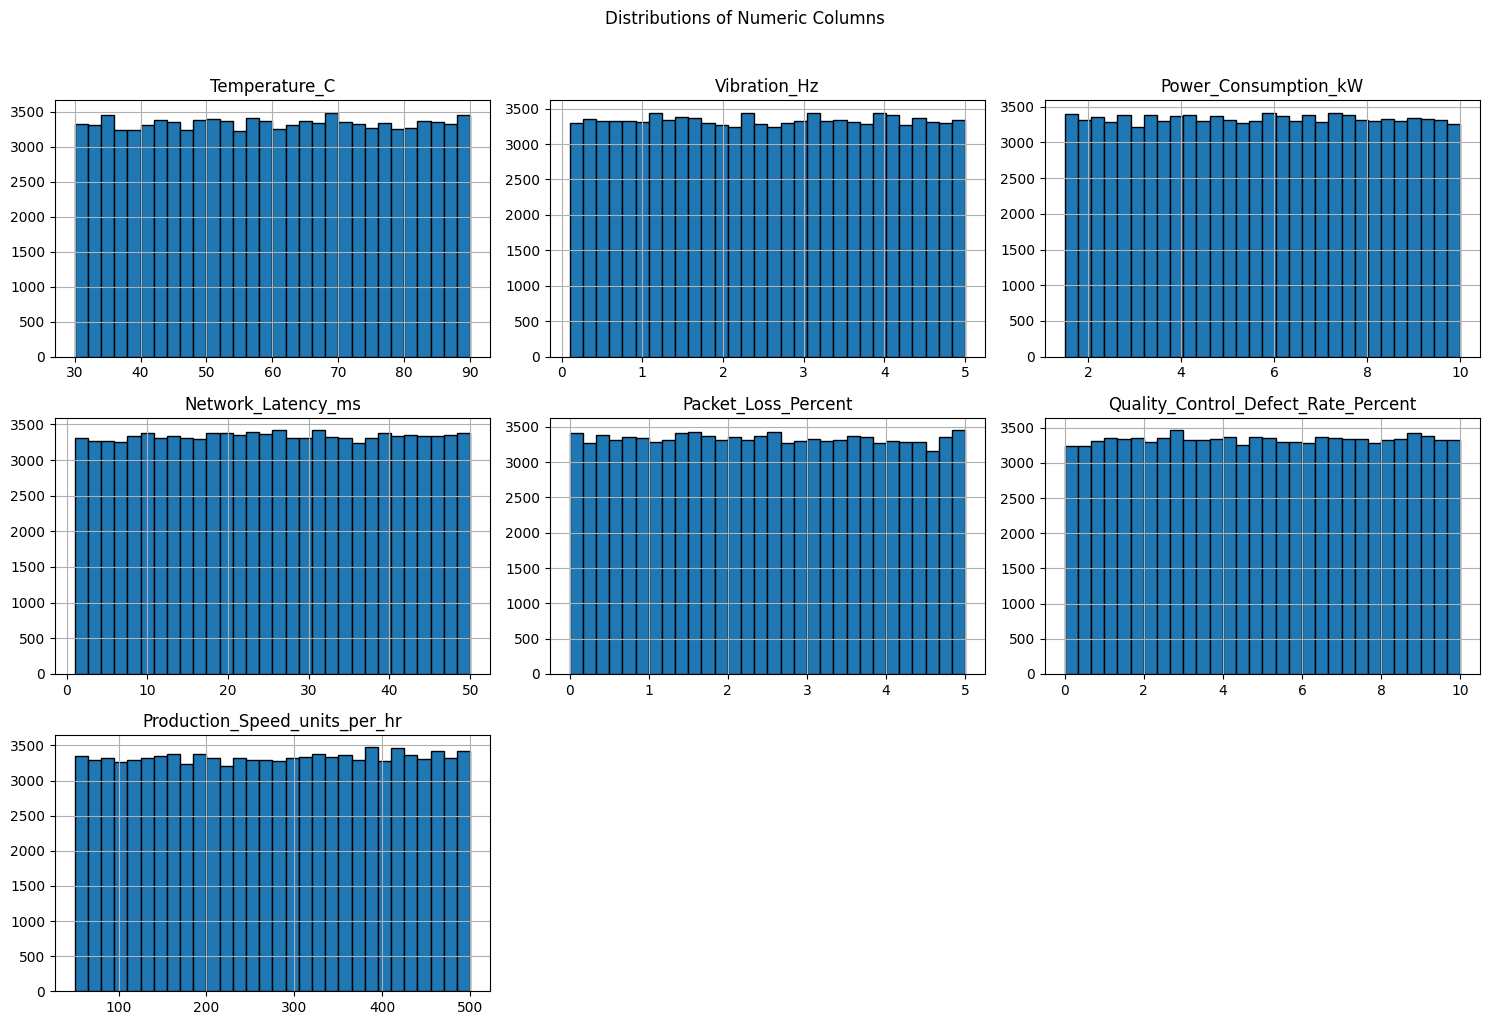

In [8]:
data[numeric_cols].hist(
    bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black'
)
plt.suptitle("Distributions of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

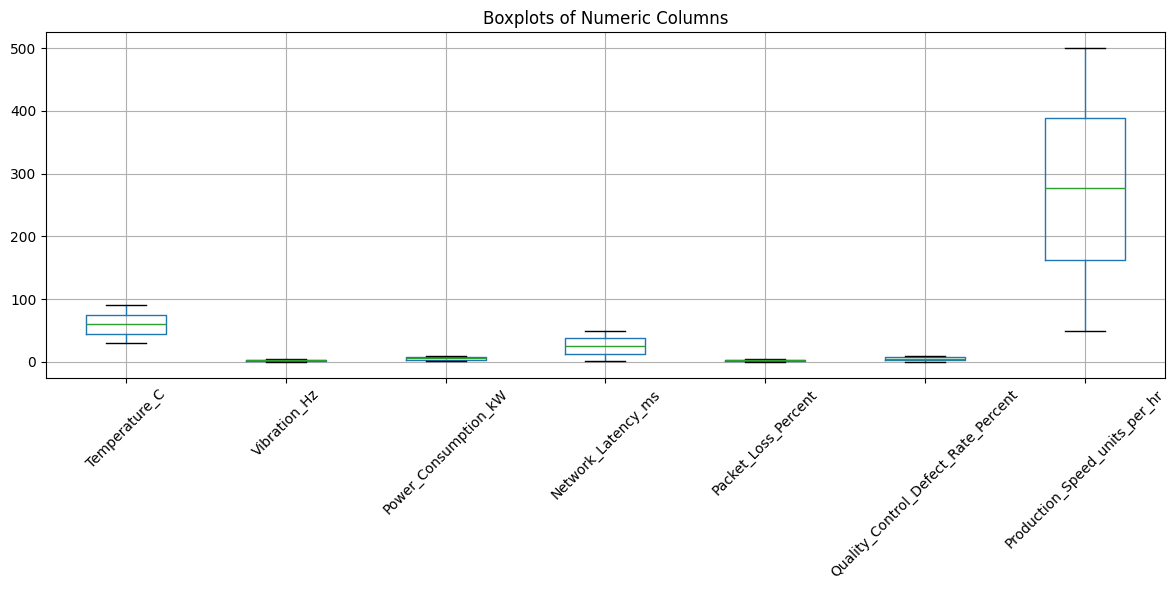

In [9]:
plt.figure(figsize=(12, 6))
data[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numeric Columns")
plt.tight_layout()
plt.show()

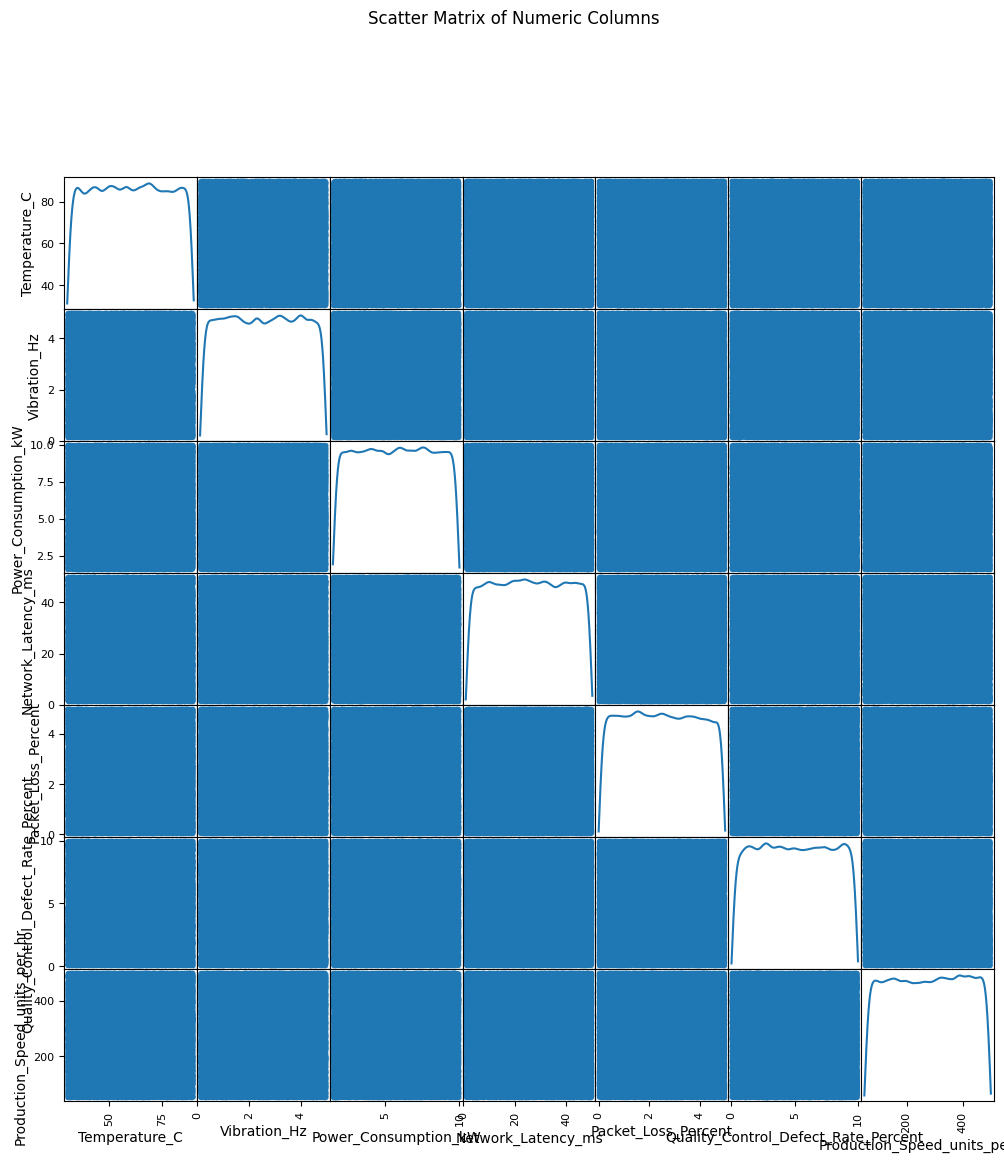

In [12]:
pd.plotting.scatter_matrix(
    data[numeric_cols], figsize=(12, 12), diagonal='kde', alpha=0.3
)
plt.suptitle("Scatter Matrix of Numeric Columns", y=1.02)
plt.show()

In [13]:
data.to_csv("cleaned-dataset.csv", index=False)